# Exercise 2


| 🔍 Thema | 📂 Datei / Pfad | 💡 Beschreibung / Was du dort findest |
|-----------|----------------|--------------------------------------|
| **Parallelisierung (MPI)** | `system/decomposeParDict` | Enthält `numberOfSubdomains` → Anzahl der Prozessorkerne (z. B. 4). Wird bei `mpirun -np 4 simpleFoam -parallel` genutzt. |
| **Felder mit Anfangs- & Randbedingungen** | `0/` | Enthält Felder wie `U`, `p`, `nut` → jeweils mit `internalField` und `boundaryField`. |
| **Inlet Velocity (Eingangsprofil)** | `0/U` | Abschnitt `inlet { ... }` → definiert die Einlassgeschwindigkeit (oft parabolisch oder uniform). |
| **Mesh-Erzeugung (Diskretisierung)** | `system/blockMeshDict` | Definition des Rechengitters (Vertices, Blocks, Edges). Wird mit `blockMesh` erzeugt. |
| **Kinematische Viskosität** | `constant/transportProperties` | Enthält `nu` (z. B. `1e-3` m²/s). Wird für Reynolds-Zahl und Impulsgleichung verwendet. |
| **Reynolds-Zahl** | aus `0/U` & `transportProperties` | Formel: `Re = U_max * D / ν`. Verwende max. Geschwindigkeit, Zylinderdurchmesser, kinematische Viskosität. |
| **Solver-Typ** | `system/controlDict` → `application` | `simpleFoam` = inkompressibel (stationär), `rhoSimpleFoam` = kompressibel. |
| **Druck-Solver (lineare Lösung)** | `system/fvSolution` | Im Block `solvers { p { ... } }` → z. B. `solver GAMG` für den Druck. |
| **Diskretisierung des konvektiven Terms** | `system/fvSchemes` | Unter `divSchemes` → z. B. `div(phi,U) Gauss linearUpwind grad(U);` |
| **Turbulenzmodell** | `constant/turbulenceProperties` | `simulationType RAS;` → RANS-Modell, z. B. `kOmegaSST` oder `kEpsilon`. |
| **Simulationszeit & Ausgabe** | `system/controlDict` | `startTime`, `endTime`, `writeInterval` → bestimmt, wie viele Zeitordner (`0`, `10`, …) erzeugt werden. |
| **Kraftkoeffizienten (Lift, Drag)** | `system/forceCoeffs` oder `system/controlDict` → `functions {}` | Definiert Berechnung von `C_D` und `C_L` auf dem Zylinder. |
| **Driving Force (Antrieb)** | `system/fvOptions` | Enthält ggf. `uniformFixedValueForce` → treibt Strömung durch konstante Kraft an. |
| **Patch-Typen** | `constant/polyMesh/boundary` | Listet alle Randflächen (`inlet`, `outlet`, `cylinder`, `front/back`, …) und deren Typ (`wall`, `cyclic`, etc.). |

---

## ⚙️ Beispiel: wichtige Kommandos

```bash
# Mesh prüfen
source $ML_CFD_BASE/RunFunctions
runApplication checkMesh

# Simulation starten (parallel)
decomposePar
mpirun -np 4 simpleFoam -parallel
reconstructPar

# Ergebnisse visualisieren
paraFoam   # oder ParaView -> post.foam öffnen


# Flow past a circular cylinder at low Reynolds number
## Drag and lift coefficients

The Reynolds number based on the cylinder diameter $d$, the average inlet velocity $\bar{U}$ and the kinematic viscosity $\nu$ is $Re=d\bar{U}/\nu = ...$.

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_128622/4273149401.py:7: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(path, skiprows=12, header=0, sep="\s+", usecols=[0,1,4], names=names)


,t,cd,cl
0,0.002,7.157332,0.001085
1,0.004,3.051406,0.001669
2,0.006,2.510282,-0.000675
3,0.008,2.299479,-0.001808
4,0.010,2.110956,-0.002186
...,...,...,...
4995,9.992,1.514016,0.091311
4996,9.994,1.514025,0.095751
4997,9.996,1.514022,0.099957
4998,9.998,1.514068,0.104374


[]

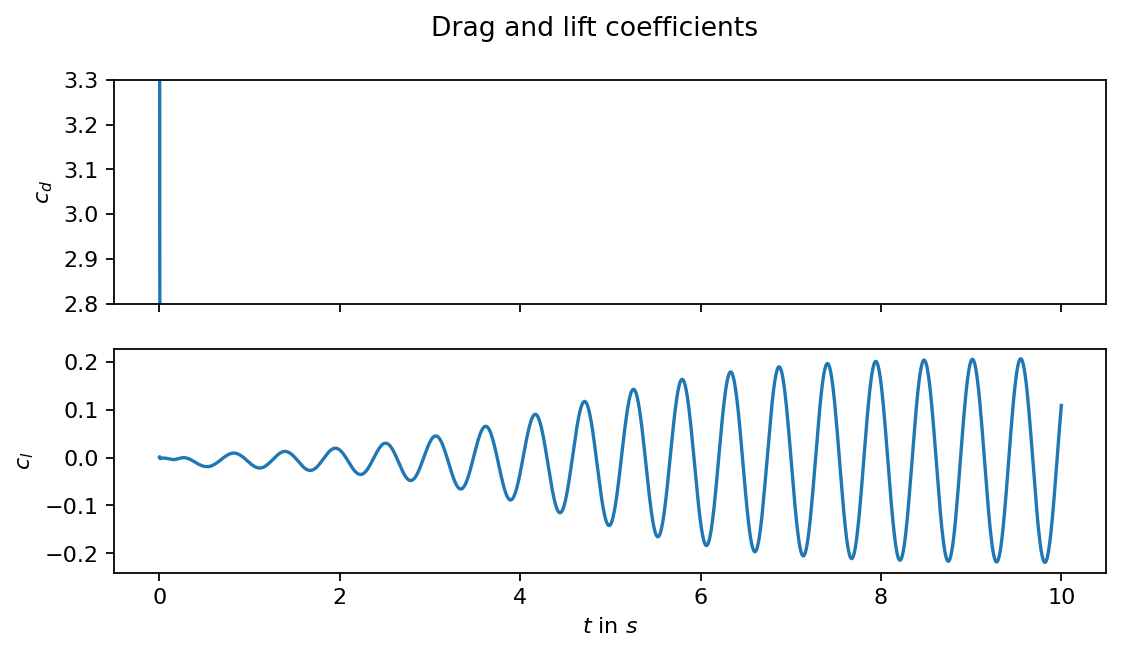

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

path = "/home/anh/Documents/ml-cfd-lecture/exercises/2-3/cylinder2D/postProcessing/forces/0/coefficient.dat"
names = ["t", "cd", "cl"]
data = pd.read_csv(path, skiprows=12, header=0, sep="\s+", usecols=[0,1,4], names=names)
display(data)

plt.rcParams["figure.dpi"] = 160

# plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
fig.suptitle("Drag and lift coefficients")

ax1.plot(data.t, data.cd)
ax2.plot(data.t, data.cl)
ax2.set_xlabel(r"$t$ in $s$")
ax2.set_ylabel(r"$c_l$")
ax1.set_ylabel(r"$c_d$")
ax1.set_ylim(2.8, 3.3)
plt.savefig("drag_and_lift.png", bbox_inches="tight")
plt.plot()

